# Homework - Logistic Regression

<hr style="clear:both">

This homework is part of a series of exercises for the CIVIL-226 Introduction to Machine Learning for Engineers course at EPFL. Copyright (c) 2023 [VITA](https://www.epfl.ch/labs/vita/) lab at EPFL  
Use of this source code is governed by an MIT-style license that can be found in the LICENSE file or at https://www.opensource.org/licenses/MIT


**2025 Revision:** [Bastien Van Delft](mailto:bastien.vandelft@epfl.ch), [Yasaman Haghighi](mailto:yasaman.haghighi@epfl.ch)

Based on the work of [David Mizrahi](mailto:david.mizrahi@epfl.ch), [Tom Winandy](mailto:tom.winandy@epfl.ch) and [Luc Reveyron](mailto:luc.reveyron@epfl.ch), [Brian Sifringer](mailto:brian.sifringer@epfl.ch), [Anne-Valérie Preto](mailto:anne-valerie.preto@epfl.ch)

<hr style="clear:both">


### Name and SCIPER

**Name:** Sophie Bitar

**SCIPER:** 345295

### Homework info
**Released:** Thursday March 20, 2025  
**Submission**: Friday April 4, 2025 (before 11:59PM) on Moodle  
**Grade weight:** 10% of the overall grade 


<div class="alert alert-danger">

**Warning:** This is an individual assignment, the exchange of code between students is forbidden.
</div>

This homework is composed of 4 parts:
- Part 1: Logistic regression (43 pts)
- Part 2: Regularization (15 pts)
- Part 3: Cross-validation (20 pts)
- Part 4: Evaluation metrics (22 pts)

**Total:** 100 pts

**Work through this exercise in order, as functions implemented early on can be used for later parts.**

**Tips:**
- Use the Table of Contents extension to quickly navigate to each part.
- In order to ensure that there are no hidden states in your notebook, frequently restart the kernel using: **Kernel -> Restart Kernel and Run all Selected Cells...**

Good luck!

### Imports

In [70]:
# Function to align all tables to the left (useful for later on)

In [1]:
%%html
<style>
table {float:left}
</style>

In [2]:
from typing import Tuple, List


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import helpers

# You do not require more imports, but if you do use any, put them below. Else, remove the ellipsis
### START CODE HERE ###

### END CODE HERE ###

# Part 1: Logistic regression

The first part of this exercise consists of implementing logistic regression for a binary classification problem. In this part, you will use a slightly modified version of the Palmer iris dataset.

## 1.1. Dataset

### Loading the data & normalization

First, you'll work on a relatively simple dataset: a modified version of the Iris dataset with only two features (Petal length and Petal with), and two species (Iris-versicolor and Iris-virginica). Using `helpers.preprocess_data()` (check helpers.py for more info), we'll obtain a training and test set.

In [3]:
iris = pd.read_csv('data/iris_m.csv')
iris.head(5)

PetalLengthCm  PetalWidthCm          Species
0            4.0           1.2  Iris-versicolor
1            5.0           2.0   Iris-virginica
2            4.3           1.3  Iris-versicolor
3            5.1           2.0   Iris-virginica
4            4.2           1.5  Iris-versicolor

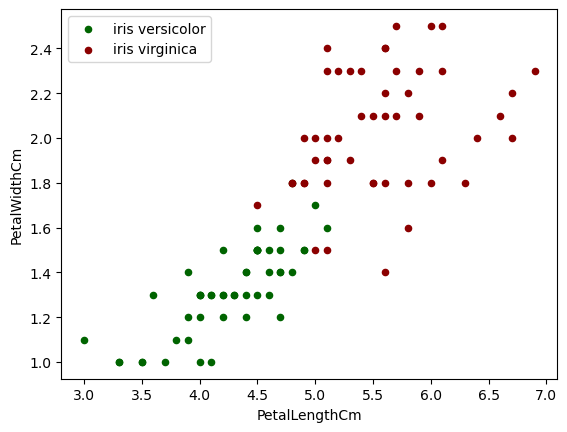

In [4]:
ax1 = iris.loc[iris["Species"]=="Iris-versicolor"].plot(kind="scatter",x = 'PetalLengthCm', y = 'PetalWidthCm', color="DarkGreen", label="iris versicolor")
ax2 =iris.loc[iris["Species"]=="Iris-virginica"].plot(kind="scatter",x = 'PetalLengthCm', y = 'PetalWidthCm', color="DarkRed", label="iris virginica", ax=ax1)

In [5]:
X_train_iris, y_train_iris, X_test_iris, y_test_iris, feature_names, label_map = helpers.preprocess_data(iris, label="Species", train_size=0.70, seed=42)

Next, you need to normalize this data with the mean and standard deviation from the training set and keep the original variable name. For example, the normalized `X_train_iris` should be called `X_train_iris`.

**Task: Normalize the training and test data using `helpers.normalize()`**

**Note:** Remember that you should not use any of the knowledge you get from the test data when implementing a model. This includes the normalization step, where you should use the mean and standard deviation of the **training set** to normalize both the **training** and **test** set.

In [6]:
# Normalize features of the training and test set using the mean and std of the training set features
### START CODE HERE ###
mean = X_train_iris.mean(axis=0)
std = X_train_iris.std(axis=0)

X_train_iris = helpers.normalize(X_train_iris,mean,std)
X_test_iris = helpers.normalize(X_test_iris,mean,std)
### END CODE HERE ###

In [7]:
# These assertions check that your normalization didn't go completely wrong. 
# Passing these assertions does not mean you will automatically get all points for that question
# We may use other tests to check the correctness of your implementation
assert np.allclose(X_train_iris.mean(axis=0), 0)
assert np.allclose(X_train_iris.std(axis=0), 1)

Let's preview the arrays for the training and test set.

In [8]:
# Preview of X_train_iris and y_train_iris (separation of the features and the labels)
print('Training set features:')
print(f'X_train_iris: \n {X_train_iris[:3]}')

print('\nTraining set labels:')
print(f'y_train_iris: \n {y_train_iris[:3]}')

Training set features:
X_train_iris: 
 [[0.10228376 0.42612767]
 [0.34499099 1.9052485 ]
 [0.22363737 0.91916795]]

Training set labels:
y_train_iris: 
 [[False  True]
 [False  True]
 [False  True]]


**Expected output:**

|                 |                                                  |
|-----------------|--------------------------------------------------|
| **X_train_iris** | [[0.10228376 0.42612767] <br> [0.34499099 1.9052485 ]<br> [0.22363737 0.91916795]]
 |
| **y_train_iris**  | [[0 1] [0 1] [0 1]]


In [9]:
# Preview of X_train_iris and y_train_iris (separation of the features and the labels)
print('Test set features:')
print(f'X_test_iris: \n {X_test_iris[:3]}')

print('\nTraining set labels:')
print(f'y_test_iris: \n {y_test_iris[:3]}')

Test set features:
X_test_iris: 
 [[ 1.92258796  0.91916795]
 [-1.83937406 -1.54603344]
 [ 1.07311267  1.16568808]]

Training set labels:
y_test_iris: 
 [[False  True]
 [ True False]
 [False  True]]


**Expected output:**

|                 |                                                  |
|-----------------|--------------------------------------------------|
| **X_test_iris** |  [[ 1.92258796  0.91916795]<br>[-1.83937406 -1.54603344]<br>[ 1.07311267  1.16568808]] |
| **y_test_iris**  | [[0 1] [1 0] [0 1]]


In [10]:
# Show shapes
print('Training set shape:')
print(f'X: {X_train_iris.shape}, y: {y_train_iris.shape}')

print('\nTest set shape:')
print(f'X: {X_test_iris.shape}, y: {y_test_iris.shape}')

Training set shape:
X: (70, 2), y: (70, 2)

Test set shape:
X: (30, 2), y: (30, 2)


### Notation

Now that we have pre-processed our dataset, here's how it looks:

- features: $\boldsymbol{X} \in \mathbb{R}^{N \times D}$, $\forall \ \boldsymbol{x}_j \in \boldsymbol{X}: \boldsymbol{x}_j \in \mathbb{R}^{D}$
- labels: $\boldsymbol{y} \in \mathbb{R}^{N \times C }$, $\forall \ y_j^{(i)} \in \boldsymbol{y}_j: y_j^{(i)} \in \{0, 1\}$ 
  
 where $N$ is the number of examples in our dataset, $D$ is the number of features per example and $C$ is the number of classes.   
 

For the weights, we have:
 
 
 - weights: $\mathbf{W} \in \mathbb{R}^{D \times C}$ 
 - bias: $\boldsymbol{b} \in \mathbb{R}^{C \times 1}$

 Note that the labels $\boldsymbol{y}$ are written as a matrix of 0s and 1s. Each row represents an entry, and has a single 1 to represent the ground truth class, while all others are zero. This is called one-hot encoding and you can learn more here.

 **Note:**
 
 $\boldsymbol{X}$ is called the design matrix, where $\boldsymbol{X}_{j, :}$ denotes $\boldsymbol{x}_j$.  
 Note that a single example $\boldsymbol{x}_j$ is a column vector of shape $(D \times 1)$, while the design matrix $\boldsymbol{X}$ is of shape $(N \times D)$, where each row represents an example and each column represents a feature.

## 1.2. Diving into logistic regression

In this section, you are going to implement the different functions needed for logistic regression.

### Softmax

A key element of multi-class logistic regression is the softmax function. This function takes any real-valued vector and outputs a same-sized vector with values in [0, 1], and that sum to 1. The softmax function is defined as:
$$\sigma_i(\boldsymbol{z})= \frac {e^{z_i}}{\sum_je^{z_j}}= \frac{1}{1+\sum_{j\neq i} e^{zj-zi}}$$

Here's an example plot of the softmax in 2D, over values of 1 dimension given all others are equal to 0:

<img src="images/sigmoid.png" alt="Sigmoid" style="width: 450px"/>

**Task: Implement `softmax()`**  

**Hint:** Use `np.exp(x)` to take the exponential of a number. You can find the documentation for this method [here](https://numpy.org/doc/stable/reference/generated/numpy.exp.html).
**Hint 2:** `keepdims=` argument, or the function `np.expand_dims()` may help you in certain broadcasting error cases
**Note:** Usually, an added term is used in the code of softmax for numerical stability purposes, it will not be required for this homework.

In [11]:
def softmax(z: np.ndarray) -> np.ndarray:
    """ Softmax function
    
    Args:
        z: Input data of shape (N, C)
        
    Returns:
        np.ndarray: Softmax of z of shape (N, C), where each value is in [0, 1] and their sum is 1.
    """
    ### START CODE HERE ###
    s = np.exp(z)/np.sum(np.exp(z),axis=1,keepdims=True)
    ### END CODE HERE ###
    return s

In [12]:
# Verify implementation
a = softmax(np.array([[3,0], [0.5,0], [-1,0]]))
print(f'a: {np.round(a, 4)}')

a: [[0.9526 0.0474]
 [0.6225 0.3775]
 [0.2689 0.7311]]


**Expected output:**

|   |                                                  |
|---|--------------------------------------------------|
| **a** | [[0.9526 0.0474] [0.6225 0.3775] [0.2689 0.7311]] |

### Logistic output

Now that you have a function that computes the softmax function, you can implement a function that gives the logistic output. As a reminder, this function outputs the estimated probabilities of an input $\boldsymbol{x}_j$ for which they belong to the classes in $$\boldsymbol{y}_j$$ , that is: $ \hat{y}_j^{(i)} = p(y^{(i)}_j = 1  | \boldsymbol{x}_j)$.  
The logistic output (of a single example and a single class) is defined as:
$$\hat{y}^{(i)}_j = \sigma_i(\mathbf{w}^{T} \boldsymbol{x}_j + \boldsymbol{b}) = \frac{e^{-(\mathbf{w}^{(i)T}  \boldsymbol{x}_j + b^{(i)})}}{\sum_k^C e^{-(\mathbf{w}^{(k)T}  \boldsymbol{x}_j + b^{(k)})}}$$

For all examples, the output is defined as: 
$$\mathbf{\hat{y}} = \sigma(\mathbf{X} \mathbf{W} + \mathbf{b})$$

To simplify the notation of the problem, you have seen in previous exercise sessions that we can add the intercepts $\boldsymbol{b}$ into the weight matrix $\mathbf{w}$ by adding a vector $\boldsymbol{1}$ into the data features of $\mathbf{X}$.

Mathematically, this creates a new set $\mathbf{X'}$ of size $(N\times D')$ where $D'= D+1$, and the weight matrix is also now $\mathbf{W'}$ of size $(D'\times C)$. For simplicity reasons, we will continue to write them as $\mathbf{X}$, $\mathbf{W}$ and $D$ after their change.

In [13]:
# Let's add a 1 vector to all our X data:
X_train_iris = helpers.insert_offset(X_train_iris)
X_test_iris = helpers.insert_offset(X_test_iris)

Once this is done, we can simply write the logistic ouput as: 
$$\mathbf{\hat{y}} = \sigma(\mathbf{X} \mathbf{W})$$

**Task: Implement `logistic_output()`**

**Hint:** To vectorize this operation , use `np.matmul(a, b)` (or equivalently `a @ b`) for matrix multiplication.  
You can find the documentation for this method [here](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html).

**Hint:** Remember that you have already coded the sigmoid function. This might help you in the logistic output implementation. 

In [14]:
def logistic_output(X: np.ndarray, w: np.ndarray) -> np.ndarray:
    """ Output of logistic regression
    
    Args:
        X: Dataset of shape (N, D)
        w: Weights of multi-class logistic regression model of shape (D, C)
    Returns:
        y_hat (np.ndarray): Output of multi-class logistic regression of shape (N, C)
    """
    ### START CODE HERE ###
    y_hat = softmax(np.matmul(X,w))
    ### END CODE HERE ###
    return y_hat

In [15]:
# Verify implementation
X = X_train_iris[:3]
w = np.array([[0,1],[0,1],[0,1]])
y_hat = logistic_output(X, w)
print(f'y_hat: {np.round(y_hat, decimals=4)}')

y_hat: [[0.1782 0.8218]
 [0.0373 0.9627]
 [0.105  0.895 ]]


**Expected output:**

|                 |                                                  |
|-----------------|--------------------------------------------------|
| **y_hat** |  [[0.1782 0.8218]<br>[0.0373 0.9627]<br>[0.105  0.895 ]]|

### Categorical Cross-Entropy Loss

In order to train your model, you also need a loss function, which penalizes outputs based on how far off they are from the ground-truth. Here, we'll use the logistic loss / categorical cross-entropy loss.

It is defined for all entries j as:
$$\text{CCE}(\mathbf{X}, \boldsymbol{y}, \mathbf{W}) = - \frac{1}{N}\sum^{N}_{j=1}\sum^{C}_i {y}_j^{(i)} \log(\hat{y}_j^{(i)}) $$ where $\log(x)$ refers to the natural logarithm of $x$.

**Task: Implement `cce_loss()`**

**Hint:** Use `np.log(x)` to take the natural logarithm of x. You can find the documentation for this method [here](https://numpy.org/doc/stable/reference/generated/numpy.log.html).

<div class="alert alert-info">
Due to floating-point arithmetic, values very close to 0 will get rounded to 0 (likewise for values very close to 1). 

However, the natural logarithm log(x) is undefined for values equal to 0. An easy way to fix this is to add a small term $\epsilon$ to the logarithm. For example, write `np.log(x + epsilon)` instead of `np.log(x)`. 
    
In order to get full points (and avoid problems in later parts of this homework), add  `epsilon` (set to $10^{-9}$) whenever you call `np.log()`.
</div>

In [16]:
def cce_loss(X: np.ndarray,  y: np.ndarray, w: np.ndarray) -> float:
    """ Categorical cross-entropy loss function
    
    Args:
        X: Dataset of shape (N, D)
        y: Labels of shape (N, C).
        w: Weights of logistic regression model of shape (D, C)
    
    Returns:
        float: categorical cross-entropy loss.
    """
    # Add the epsilon term to the np.log() in your implementation (e.g. do np.log(x + epsilon) instead of np.log(x))
    # Epsilon is there to avoid log(0)
    epsilon = 1e-9
    
    ### START CODE HERE ###

    loss = -np.sum(np.sum(y*np.log(logistic_output(X,w) + epsilon)))/X.shape[0]
    ### END CODE HERE ###
    
    return loss

In [17]:
# Verify implementation
X = X_train_iris[:3]
y  = y_train_iris[:3]
w = np.array([[0,1],[0,1],[0,1]])

loss = cce_loss(X, y, w)
print(f'Loss: {loss:.3f}')

Loss: 0.115


**Expected output:**

|                 |                                                  |
|-----------------|--------------------------------------------------|
| **Loss** | 0.115|

### Categorical Cross-Entropy Loss Gradient


After having computed the loss, you need to update the parameters of the model in order to decrease it. This can be done with gradient descent, and for that, you'll need the gradient of your loss function.

We can calculate the gradient of cross entropy loss, by applying chain rule. Please note that we consider softmax as the activation function as mentioned above, and z is the logits (output before softmax). This is for a a single entry, where L stands for a single entry CCE-Loss:

$$\frac{\partial L}{\partial z_i} = - \sum^C_{j=1}{\frac{\partial ({y}^{(j)} \log(\hat{y}^{(j)}))}{\partial z_i}} =   - \sum^C_{j=1}{{y}^{(j)} \frac{\partial  \log(\hat{y}^{(j)})}{\partial z_i}} = - \sum^C_{j=1}{{y}^{(j)} \frac{1}{\hat{y}^{(j)}} \frac{\partial \hat{y}^{(j)}}{\partial z_i}} = - \frac{{y}^{(i)}}{\hat{y}^{(i)}} \frac{\partial \hat{y}^{(i)}}{\partial z_i} - \sum_{i \not= j}{\frac{{y}^{(j)}}{\hat{y}^{(j)}} \frac{\partial \hat{y}^{(j)}}{\partial z_i}} $$
$$= - \frac{{y}^{(i)}}{\hat{y}^{(i)}} {\hat{y}^{(i)}}(1-{\hat{y}^{(i)}}) - \sum_{i \not= j}{ \frac{{y}^{(j)}}{\hat{y}^{(j)}}(-\hat{y}^{(j)}\hat{y}^{(i)})} = - {y}^{(j)} + {y}^{(i)} \hat{y}^{(i)} + \sum_{i \not= j}{{y}^{(j)} \hat{y}^{(i)}} = - {y}^{(i)} + \sum^C_{j=1}{{y}^{(j)} \hat{y}^{(i)}} $$ 

$$= - {y}^{(i)} +  \hat{y}^{(i)} \sum^C_{j=1}{{y}^{(j)}} = -{y}^{(i)} + \hat{y}^{(i)}$$


Since $\mathbf{z} = \mathbf{Xw}$, we can easily derive the gradient with respect to $\mathbf{w}$

A vectorized implementation of this expression over the entire dataset can be derived from the following:  

$$\frac{\partial \text{CCE}(\mathbf{w})}{\partial \mathbf{w}} = \frac{1}{N}\sum_j^N\frac{\partial \mathbf{z_j}}{\partial \mathbf{w}}\frac{\partial L}{\partial \mathbf{z_j}} = \frac{1}{N} \ \left(\frac{\partial \mathbf{X} \mathbf{w}}{\partial \mathbf{w}}\right)^T  (\mathbf{ \hat{y}} - \mathbf{{y}})$$

**Task: Implement `cce_gradient()`**

In [18]:
def cce_gradient(X: np.ndarray,  y: np.ndarray, w: np.ndarray) -> Tuple[np.ndarray, float]:
    """ Gradient of the categorical cross-entropy loss
    
    Args:
        X: Dataset of shape (N, D)
        y: Labels of shape (N, C)
        w: Weights of logistic regression model of shape (D, C)
        
    Returns:
        dw (np.ndarray) gradient of the loss with respect to w of shape (D, C)
    """
    ### START CODE HERE ###
    
    dw = X.T @ (logistic_output(X,w)-y)/X.shape[0]
    ### END CODE HERE ###
    return dw
    

In [19]:
# Verify implementation
X = X_train_iris[:3]
y  = y_train_iris[:3]
w = np.array([[1,0], [-1,0], [0,2]])


dw = cce_gradient(X, y, w)
print(f'dw: {np.round(dw, decimals=4)}')


dw: [[ 0.2697 -0.2697]
 [ 0.0413 -0.0413]
 [ 0.1773 -0.1773]]


**Expected output:**

|    |                                   |
|----|-----------------------------------|
| **dw** | [[ 0.2697 -0.2697]<br>[ 0.0413 -0.0413]<br>[ 0.1773 -0.1773]]|

### Classification

The output of logistic regression estimates $ \hat{y}^{(i)} = P(y^{(i)} = 1  | \boldsymbol{x})$ for every class. The softmax function has the proprety that $\sum_i\hat{y}^{(i)} = 1$.

Based on this output, you'll want to classify each example in its correct class $c\in \{0,...,C-1\}$. To do so, you'll need to find which index i in $\hat{y}^{(i)}$ has the highest probability score, and use this index as your class prediction.

**Task: Implement `classify()`**

**Hint:** Use `np.argmax()`. You can find the documentation for this method [here](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [20]:
def classify(y_hat: np.ndarray) -> np.ndarray:
    """ Classification function for  multi-class logistic regression. 
    
    Args:
        y_hat (np.array): Output of logistic regression of shape (N, C).
    Returns:
        np.array: Label assignments (indices) of data of shape (N, )
    """
    ### START CODE HERE ###
    labels_pred = np.argmax(y_hat,axis=1)
    ### END CODE HERE ###
    return labels_pred

In [21]:
# Example of 2 predictions for C=2 
y_hat = np.array([[0.6, 0.4], [0.25, 0.75]])
print(classify(y_hat))

[0 1]


**Expected output:** [0 1] 

### Converting One-Hot labels to Indices 

You may have realized that we are now able to classify a prediction by assigning it to a class number, but that are ground truths are still one-hot encoded. For many of the upcoming functions, it will be easier to have ground truths as class indices instead. 

Mathematically, we currently have $\boldsymbol{y} \in \mathbb{R}^{N \times C}$, $\forall \ y^{(i)} \in \boldsymbol{y}: y^{(i)} \in \{0, 1\}$. 
Our function will map the labels to $\boldsymbol{y} \in \mathbb{R}^{N}$, $\forall \ y^{(i)} \in \boldsymbol{y}: y^{(i)} \in \{0, 1, ..., C-1\}$, where $y^{(i)}$ takes the value of the index in which it was one-hot encoded. 

**Hint:** It is exactly the same as the previous function called classify

In [22]:
def convert_onehot_to_class(y: np.ndarray) -> np.ndarray:
    """ Turn a one-hot label matrix into an class-based label array. 
    
    Args:
        y (np.array): Ground Truth labels of shape (N, C).
    Returns:
        np.array: Label assignments (indices) of data of shape (N, )
    """
    ### START CODE HERE ###
    y_class_labels = np.argmax(y,axis=1)
    ### END CODE HERE ###
    return y_class_labels

In [23]:
# Example of ground truth labels: 
y = np.array([[0,1,0], [0,0,1]])
print(convert_onehot_to_class(y))


[1 2]


**Expected output:** [1 2] 

### Accuracy

To measure how well your model is doing, we'll first consider the accuracy as our metric. It corresponds to the fraction of predictions our model got right. Note that we inputs are index based ground truths and classified predictions.

$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$



**Task: Implement `accuracy()`**

In [24]:
def accuracy(labels_class_gt: np.ndarray, labels_pred: np.ndarray) -> float:
    """Computes the accuracy.

    Args:
        labels_class_gt: labels as indices (ground-truth) of shape (M, ).
        labels_pred: Predicted labels as indices of shape (M, ).

    Returns:
        float: Accuracy, in range [0, 1].
    """
    ### START CODE HERE ###
    return np.sum(labels_class_gt == labels_pred)/len(labels_class_gt)
    ### END CODE HERE ###

In [25]:
# Check that output is in [0, 1] (ensures that output is not a percentage)
assert 0.0 <= accuracy(np.array([1, 0]), np.array([1, 1])) <= 1.0


<div class="alert alert-warning">

**Discuss** the drawbacks of using accuracy as the sole evaluation metric for classification tasks. What are some scenarios where accuracy might not provide a complete picture of model performance? Provide examples to support your explanation.
</div>

over/underfitting: if it is too accurate, we are dealing with an overfitting. the model won't predict correctly when used after training sets

imbalanced classes: some classes with more samples will appear more often accurate, thus hiding the performance issues of predicting the other classes, with fiewer samples. [ex: pets in housholds{dog (prob=99%),elephant(prob=1%)}, the model can just say dog and be correct more often]

continuous labels instead of class labels in regression tasks [ex:house prising]

## 1.3. Training
You will now implement the training process by putting together all the functions you have implemented so far.

Here are the different steps of the training process:
- Compute the output of logistic regression (`y_hat`)
- Compute the loss of the model (`loss`)
- Compute the derivates w.r.t to the weights `dw`
- Update `w`

Recall that a gradient step is: 
$$ \mathbf{w}  := \mathbf{w} - \alpha \frac{\partial J}{\partial \mathbf{w}} $$

where $J$ is the loss function and $\alpha$ is the learning rate.

**Task: Complete the following `train_logistic_regression()` function.**

In [26]:
def train_logistic_regression(X: np.ndarray, 
                              y: np.ndarray, 
                              max_iters: int = 101, 
                              lr: float = 0.5, 
                              loss_freq: int = 0) -> Tuple[np.ndarray, float, dict]:
    """ Training function for binary class logistic regression using gradient descent
    
    Args:
        X: Dataset of shape (N, D).
        y: Labels of shape (N, C).
        max_iters: Maximum number of iterations. Default : 100
        lr: The learning rate of  the gradient step. Default : 1
        loss_freq : Prints the loss every `loss_freq` iterations. Default : 0
        
    Returns:
        w: weights of shape (D, C)
        viz_d: dict used for visualizations
    """
    
    # Initialize weights
    np.random.seed(0)
    y_class = convert_onehot_to_class(y)
    w = np.random.normal(0, 1, size=(X.shape[1],y.shape[1]))
    
    # Initialize dict with lists to keep track of loss, accuracy, weight and bias evolution
    logger = {'loss': [], 
             'acc': [], 
             'w': []
            }
    
    
    for i in range(max_iters):
        # Compute loss, dw, db and update w and b 
        ### START CODE HERE ###
        #y_hat= logistic_output(X,w) 
        b=w[:,-1]

        loss = cce_loss(X,y,w)
        dw = cce_gradient(X,y,w)
        db = dw[:,-1]

        
        w = w-lr*dw
        b = b-lr*db
        
        ### END CODE HERE ###
        
        # Keep track of parameter, loss and accuracy values for each iteration
        logger['w'].append(w)
        logger['loss'].append(loss)
        y_hat = logistic_output(X, w)
        logger['acc'].append(accuracy(y_class, classify(y_hat)))
        
        if (loss_freq !=0) and i % loss_freq == 0:
            print(f'Loss at iter {i}: {loss:.5f}')
        
    if (loss_freq != 0):
        print('\nFinal loss: {:.5f}'.format(logger['loss'][-1]))
        
    return w, logger

Now, run the following cell with the default hyperparameters (max_iters=101, lr=0.5) to train your model parameters (`w`).

In [27]:
w, logger = train_logistic_regression(X_train_iris, y_train_iris, max_iters=101, lr=0.5, loss_freq=5)

Loss at iter 0: 1.78961
Loss at iter 5: 0.37676
Loss at iter 10: 0.23665
Loss at iter 15: 0.19474
Loss at iter 20: 0.17358
Loss at iter 25: 0.16023
Loss at iter 30: 0.15080
Loss at iter 35: 0.14365
Loss at iter 40: 0.13799
Loss at iter 45: 0.13335
Loss at iter 50: 0.12945
Loss at iter 55: 0.12611
Loss at iter 60: 0.12321
Loss at iter 65: 0.12066
Loss at iter 70: 0.11838
Loss at iter 75: 0.11634
Loss at iter 80: 0.11449
Loss at iter 85: 0.11281
Loss at iter 90: 0.11127
Loss at iter 95: 0.10985
Loss at iter 100: 0.10853

Final loss: 0.10853


**Expected output:**

|            |         |
|------------|---------|
| **Final loss**  | 0.10853 |

## 1.4. Results

### Model accuracy
Great, your model is trained! But how well does it perform? To find out, run the following cells to get the accuracy of your trained model on the train and test set.

In [28]:
# Train acc
y_hat = logistic_output(X_train_iris, w)
y_class = convert_onehot_to_class(y_train_iris)
acc = accuracy(y_class, classify(y_hat))
print(f'Train accuracy: {100 * acc:.2f}%')

Train accuracy: 94.29%


In [29]:
# Test acc
y_hat = logistic_output(X_test_iris, w)
y_class = convert_onehot_to_class(y_test_iris)
acc = accuracy(y_class, classify(y_hat))
print(f'Test accuracy: {100*acc:.2f}%')

Test accuracy: 93.33%


**Expected output:**

|            |         |
|------------|---------|
| **Train accuracy**  | 94.29% |
| **Test accuracy**  | 93.33% |

### Visualization of the training
Let's observe how the training went. The first graph plots the evolution of the loss during the training while the second graph plots the evolution of the accuracy during the training. If everything was implemented correctly, you'll notice that as training goes on, the loss decreases and the training accuracy tends to increase.

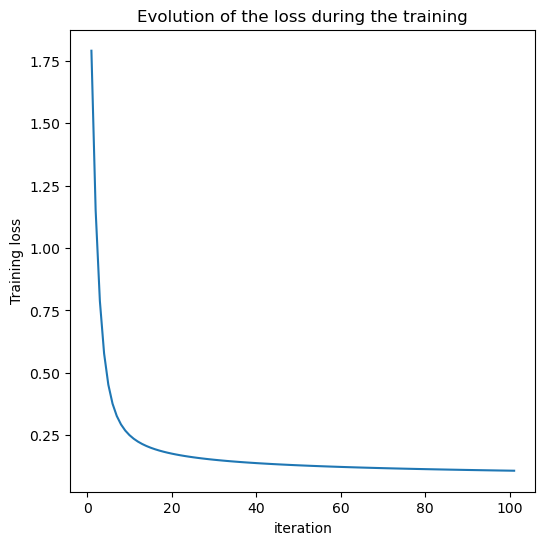

In [30]:
# Plot the evolution of loss during training
def plot_loss(loss_list):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    step = np.arange(1, len(loss_list)+1)
    plt.plot(step, loss_list)
    plt.title('Evolution of the loss during the training')
    plt.xlabel('iteration')
    plt.ylabel('Training loss')
    plt.show()

plot_loss(logger["loss"])

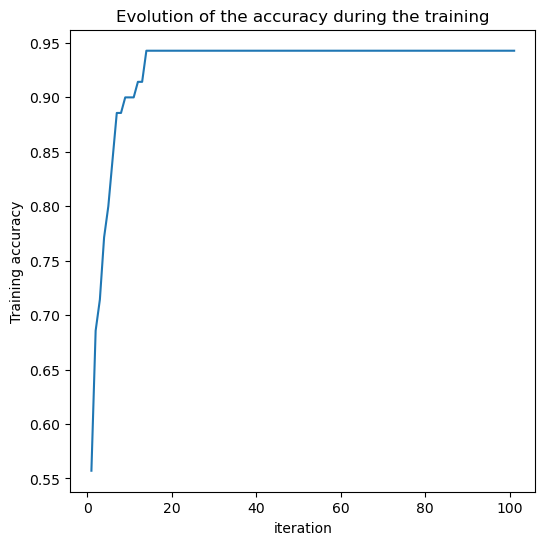

In [31]:
# Plot the evolution of accuracy during training
def plot_acc(acc_list):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    step = np.arange(1, len(acc_list)+1)
    plt.plot(step, acc_list)
    plt.title('Evolution of the accuracy during the training')
    plt.xlabel('iteration')
    plt.ylabel('Training accuracy')

plot_acc(logger["acc"])

### Plotting results

We also implemented functions in helpers.py which can help you visualize the decision boundary for this model, and visualize which points are correctly classified, and which aren't. This step is important in the process of developing your algorithm as it allows you to make sense of the mathematical result you obtained. 

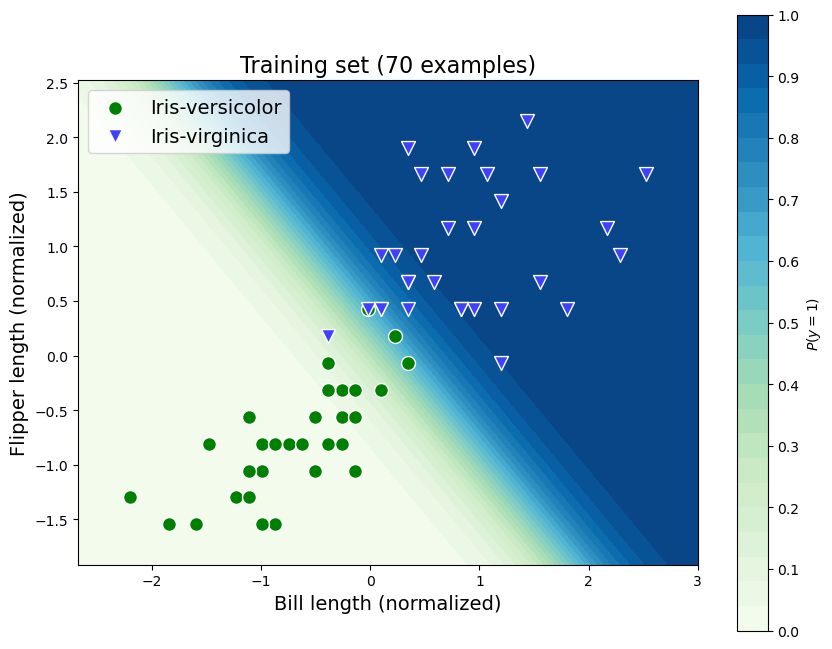

In [32]:
class_names = list(label_map.values())
ax_titles = ["Bill length (normalized)", "Flipper length (normalized)"]
helpers.plot_boundaries(X=X_train_iris,
                        y=y_train_iris, 
                        w=w,
                        output_func=logistic_output, 
                        class_names=class_names, 
                        ax_titles=ax_titles,
                        train=True)

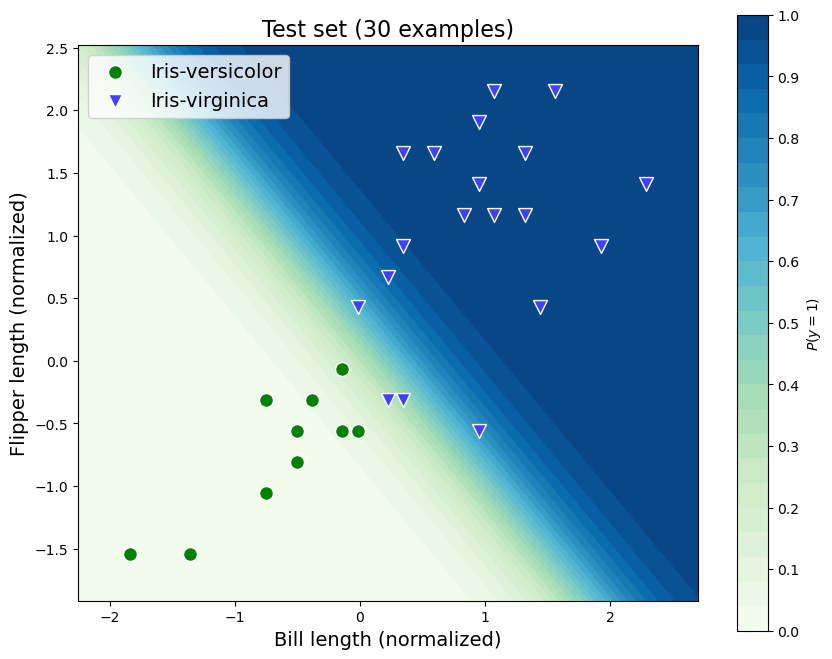

In [33]:
helpers.plot_boundaries(X=X_test_iris, 
                        y=y_test_iris, 
                        w=w, 
                        output_func=logistic_output, 
                        class_names=class_names, 
                        ax_titles=ax_titles, 
                        train=False)

If everything was implemented correctly, you'll notice that your model fits the training data with a good accuracy and also generalizes to the test data. Generalizing to new and unknown data points is the ultimate goal of any machine learning algorithm. In our case, the visualisation highlights this property.

### Training visualization

We alo implemented an interactive function which you can use to visualize the decision boundaries at different iterations. 
Notice how the decision boundary gradually improves during training?

In [34]:
helpers.interactive_boundaries(X_train_iris, 
                               y_train_iris, 
                               X_test_iris, 
                               y_test_iris, 
                               logger["w"], 
                               logistic_output, 
                               class_names, 
                               ax_titles, 
                               total_steps=50)

Good job on completing the first part of this exercise! In the next parts, we'll implement a slightly modified version of logistic regression and train it on a different dataset. The functions implemented so far will prove to be very useful later on, so make sure that they are correct!

# Part 2: Regularization

The second part of this exercise consists of adding regularization to improve logistic regression's performance on a higher dimensional dataset.

## 2.1. Connectionist Bench Dataset

In this part, you'll use the Connectionist Bench Dataset, where the task is to train a model to discriminate between sonar signals bounced off a mine (metal cylinder) and those bounced off a roughly cylindrical rock. Each sample is composed of 60 features and a label: "S" if it is a stone and "M" if it is Metal (mine).

In [35]:
sonar = pd.read_csv("data/sonar.csv")

In [36]:
print(f"Shape: {sonar.shape}")

sonar.head(5)

Shape: (208, 61)


0       1       2       3       4       5       6       7       8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

        9  ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  target  
0  0.0090  0.0032       R  
1  0.0052  0.0044       R  
2  0.0095  0.0078       R  
3  0.0040  0.0117       R  
4  0.0107  0.0094       R  

[5 rows x 61 columns]

We use `helpers.preprocess_data()` to extract a training and test set from this data. The label "M" (metal) is mapped to 0 and the label "S" (stone) is mapped to 1.

In [37]:
X_train_sonar, y_train_sonar, X_test_sonar, y_test_sonar, feature_names, label_map = helpers.preprocess_data(sonar, label="target", train_size=0.75, seed=42)

In [38]:
label_map

{0: 'M', 1: 'R'}

You also need to normalize the data, as was done in the previous part. You can use `helpers.normalize()` to do so.

**Task: Normalize `X_train_sonar` and `X_test_sonar` using `helpers.normalize()`**

In [39]:
# Normalize features of the training and test set using the mean and std of the training set features
# Use helpers.normalize()
### START CODE HERE ###
mean = X_train_sonar.mean(axis=0)
std = X_train_sonar.std(axis=0)

X_train_sonar = helpers.normalize(X_train_sonar,mean,std)
X_test_sonar = helpers.normalize(X_test_sonar,mean,std)
### END CODE HERE ###

In [40]:
assert np.allclose(X_train_sonar.mean(axis=0), 0)
assert np.allclose(X_train_sonar.std(axis=0), 1)

In [41]:
# Now we add a column to simplify our intercept:
X_train_sonar = helpers.insert_offset(X_train_sonar)
X_test_sonar = helpers.insert_offset(X_test_sonar)

In [42]:
# Show shapes
print('Training set shape:')
print(f'X: {X_train_sonar.shape}, y: {y_train_sonar.shape}')

print('\nTest set shape:')
print(f'X: {X_test_sonar.shape}, y: {y_test_sonar.shape}')

Training set shape:
X: (156, 61), y: (156, 2)

Test set shape:
X: (52, 61), y: (52, 2)


Now that you've processed the data, let's check how well logistic regression performs without regularization.

In [43]:
w, _ = train_logistic_regression(X_train_sonar, y_train_sonar, max_iters=1001, lr=0.5, loss_freq=100)

Loss at iter 0: 5.20856
Loss at iter 100: 0.19418
Loss at iter 200: 0.11998
Loss at iter 300: 0.09359
Loss at iter 400: 0.07861
Loss at iter 500: 0.06846
Loss at iter 600: 0.06092
Loss at iter 700: 0.05503
Loss at iter 800: 0.05025
Loss at iter 900: 0.04628
Loss at iter 1000: 0.04293

Final loss: 0.04293


In [44]:
# Train acc
y_hat = logistic_output(X_train_sonar, w)
acc = accuracy(np.argmax(y_train_sonar, axis=-1), classify(y_hat))
print(f'Train accuracy: {100 * acc:.2f}%')

Train accuracy: 100.00%


In [45]:
# Test acc
y_hat = logistic_output(X_test_sonar, w)
acc = accuracy(np.argmax(y_test_sonar, axis=-1), classify(y_hat))
print(f'Test accuracy: {100*acc:.2f}%')

Test accuracy: 73.08%


## 2.2. Penalized logistic regression

### Penalized categorical cross-entropy loss

Logistic regression can overfit when there are too many parameters compared to training examples, as it can find weights for which the decision boundary perfectly separates all the training examples. When such overfitting occurs, the weights are often set to large values. One way to reduce such overfitting is to prevent weights from becoming so large, which can be done using L2 regularization, which consists of changing the training objective to penalize "large" weights. The name L2 regularization comes from the fact that weights are penalized using the L2-norm.

We will call this new training objective (new loss function) the penalized categorical-cross entropy loss (or PCCE), it is expressed as:

$$
\text{PCCE}(\mathbf{w}) = \text{CCE}(\mathbf{w}) + \lambda \|\mathbf{w}\|_{2}^{2} = \text{CCE}(\mathbf{X}, \boldsymbol{y}, \mathbf{W}) = - \frac{1}{N}\sum^{N}_{j=1}\sum^{C}_i {y}_j^{(i)} \log(\hat{y}_j^{(i)})  + \lambda\|\mathbf{w}\|_{2}^{2}
$$

As you can see, this loss function consists of adding a penalty term to CCE, which **penalizes the weights but not the bias term**. The hyper-parameter $\lambda$ controls overfitting. The larger its value, the more the weights are penalized for being large, which makes the model less flexible.

**Task: Implement `penalized_cce_loss()`.**

**Note:** `lambda` is a reserved keyword in Python (used for lambda expressions), so no variables can be named this way. In our function, we use `lambd` as a variable name instead.

In [46]:
def penalized_cce_loss(X: np.ndarray,  y: np.ndarray, w: np.ndarray, lambd: float) -> float:
    """ Penalized categorical cross-entropy loss function
    
    Args:
        X: Dataset of shape (N, D)
        y: Labels of shape (N, C).
        w: Weights of logistic regression model of shape (D, C)
        lambd: regularization coefficient (named this way as lambda is a reserved keyword in python)
    
    Returns:
        float: categoricall cross-entropy loss.
    """
    ### START CODE HERE ###
    W_copy=w.copy()
    W_copy[0,:]=0
    loss = cce_loss(X,y,w)-lambd*np.sum(np.square(W_copy))
    ### END CODE HERE ###
    return loss

In [47]:
X = X_train_sonar[:3]
y  = y_train_sonar[:3]
w = np.ones((X.shape[1], y.shape[1]))

loss = penalized_cce_loss(X, y, w, lambd=0.1)
assert(isinstance(loss, float))

### Penalized categorical cross-entropy loss gradient

In order to use the penalized categorical cross-entropy loss, you need its gradient. This time, we won't give you the gradient formula, you'll need to figure it out yourself!

<div class="alert alert-warning">

**Task: Figure out the gradient for the penalized categorical cross-entropy loss and implement `penalized_cce_gradient()`.**

**Hint:** You can use the gradient of the categorical cross-entropy loss as a starting point.

Here are two useful resources for matrix calculus:
- http://www.matrixcalculus.org/
- https://en.wikipedia.org/wiki/Matrix_calculus

</div>

<blockquote>
WRITE YOUR ANSWER HERE

$$

\frac{\partial \text{PCCE}(\mathbf{w})}{\partial \mathbf{w}} = \frac{\partial \text{CCE}(\mathbf{w})}{\partial \mathbf{w}} + \frac{\partial \lambda\|\mathbf{w}\|_{2}^{2}}{\partial \mathbf{w}} = \frac{\partial \text{CCE}(\mathbf{w})}{\partial \mathbf{w}} +2\lambda\text{w}

$$

</blockquote>

In [48]:
def penalized_cce_gradient(X: np.ndarray,  
                           y: np.ndarray, 
                           w: np.ndarray, 
                           lambd: float) -> Tuple[np.ndarray, float]:
    """ Gradient of the penalized categorical cross-entropy loss
    
    Args:
        X: Dataset of shape (N, D)
        y: Labels of shape (N, C)
        w: Weights of logistic regression model of shape (D, C)
        lambd: regularization coefficient (named this way as lambda is a reserved keyword in python)
        
    Returns:
        dw (np.ndarray) gradient of the loss with respect to w of shape (D, C)
    """
    ### START CODE HERE ###
    W_copy=w.copy()
    W_copy[0,:]=0
    dw = cce_gradient(X,y,w) + 2*lambd*W_copy
    ### END CODE HERE ###
    
    return dw 
    

In [49]:
X = X_train_sonar[:3]
y  = y_train_sonar[:3]
w = np.ones((X.shape[1], y.shape[1]))

dw = penalized_cce_gradient(X, y, w, lambd=0.1)
assert(dw.shape == w.shape)


### Training

Now that you've implemented the loss function and its gradient, you can use it to train your model.

**Task: Implement `train_penalized_logistic_regression()`.**

**Hint:** This training function is very similar to the one implemented in Part 1.

In [50]:
def train_penalized_logistic_regression(X: np.ndarray, 
                                        y: np.ndarray, 
                                        lambd: float, 
                                        max_iters: int = 1001, 
                                        lr: float = 0.5, 
                                        loss_freq: int = 0) -> Tuple[np.ndarray, float, dict]:
    """ Training function for multi-class penalized logistic regression using gradient descent
    
    Args:
        X: Dataset of shape (N, D).
        y: Labels of shape (N, C).
        lambd: regularization coefficient (named this way as lambda is a reserved keyword in python)
        max_iters: Maximum number of iterations.
        lr: The learning rate of  the gradient step.
        loss_freq : Prints the loss every `loss_freq` iterations.
        
    Returns:
        w: weights of shape (D, C)
        viz_d: dict used for visualizations
    """
    
    # Initialize weights
    np.random.seed(0)
    y_class = convert_onehot_to_class(y)
    w = np.random.normal(0, 1, size=(X.shape[1], y.shape[1]))
    
    # Initialize dict with lists to keep track of loss, accuracy, weight and bias evolution
    logger = {'loss': [], 
             'acc': [], 
            }
    
    
    for i in range(max_iters):
        # Compute loss and dw and update w
        ### START CODE HERE ###
        loss = penalized_cce_loss(X,y,w,lambd)
        dw = penalized_cce_gradient(X,y,w,lambd)
        
        w = w-lr*dw
        
        ### END CODE HERE ###
        
        # Keep track of loss and accuracy values for each iteration
        logger['loss'].append(loss)
        
        y_hat = logistic_output(X, w)
        logger['acc'].append(accuracy(y_class, classify(y_hat)))
        
        if (loss_freq !=0) and i % loss_freq == 0:
            print(f'Loss at iter {i}: {loss:.5f}')
        
    if (loss_freq != 0):
        print('\nFinal loss: {:.5f}'.format(logger['loss'][-1]))
        
    return w, logger

Let's now the check that there are no huge mistakes in your implementation by training your model for two different values of $\lambda$ and checking the training accuracy. Given that regularization reduces overfitting, you should expect the training accuracy to decrease when $\lambda$ increases.

In [51]:
w, _ = train_penalized_logistic_regression(X_train_sonar, y_train_sonar, lambd=0, max_iters=1001, lr=0.5, loss_freq=100)
y_hat = logistic_output(X_train_sonar, w)
acc = accuracy(convert_onehot_to_class(y_train_sonar), classify(y_hat))
print(f'Train accuracy: {100*acc:.2f}%')

Loss at iter 0: 5.20856
Loss at iter 100: 0.19418
Loss at iter 200: 0.11998
Loss at iter 300: 0.09359
Loss at iter 400: 0.07861
Loss at iter 500: 0.06846
Loss at iter 600: 0.06092
Loss at iter 700: 0.05503
Loss at iter 800: 0.05025
Loss at iter 900: 0.04628
Loss at iter 1000: 0.04293

Final loss: 0.04293
Train accuracy: 100.00%


In [52]:
w, _ = train_penalized_logistic_regression(X_train_sonar, y_train_sonar, lambd=0.1, max_iters=1001, lr=0.5, loss_freq=100)
y_hat = logistic_output(X_train_sonar, w)
acc = accuracy(convert_onehot_to_class(y_train_sonar), classify(y_hat))
print(f'Train accuracy: {100*acc:.2f}%')

Loss at iter 0: -7.91864
Loss at iter 100: 0.26052
Loss at iter 200: 0.26052
Loss at iter 300: 0.26052
Loss at iter 400: 0.26052
Loss at iter 500: 0.26052
Loss at iter 600: 0.26052
Loss at iter 700: 0.26052
Loss at iter 800: 0.26052
Loss at iter 900: 0.26052
Loss at iter 1000: 0.26052

Final loss: 0.26052
Train accuracy: 90.38%


Now that you've implemented penalized logistic regression, you may wonder which value of $\lambda$ to pick. This is what we'll try to figure out in part 3, using cross-validation.

# Part 3: Cross-validation

In this class, you saw that a dataset is usually split into 3 parts: One training set, one validation set and one test set. The training set is used as training data, the validation set is used for tuning hyper-parameters and the test set is held out for final evaluation. However, by partitioning data this way, we reduce the number of samples available for training the model, and the results on the validation depend on a particular random choice for the training and validation sets. For datasets with a small amount of training examples, this can be especially problematic.


This is where cross-validation comes into play. With cross-validation, a test set will still be held out for final evaluation, but there is no need for a designated validation set. Here, you will implement a non-exhaustive cross-validation technique known as k-fold cross-validation.

## 3.1. k-Fold Cross-validation

In k-fold cross-validation, the training data is randomly partitioned into $k$ equal sized subsamples. Of the $k$ subsamples, a single subsample is used as the validation data, and the remaining $k-1$ subsamples are used as training data. This process is repeated $k$ times, with each of the $k$ subsamples used exactly once as the validation data. The $k$ results are then averaged to produce a single estimation. 

This process is illustrated below:

<img src="images/kfold_cv.png" alt="kfold" style="width:500px"/>

We have implemented the function `k_fold_indices()` for you, which generates indices for k-fold cross-validation. You can see its implementation and an example usage in the cell below.

<div class="alert alert-warning">

**Discuss:** Explain the purpose of the validation set in the context of k-fold cross-validation. How is the validation set utilized during each iteration of the cross-validation process?

</div>

Each fold is used as a test set, making the rest of the folds the training set. This allows for k different models, providing a more reliable estimate of performance, especially with small datasets. By averaging the results across all folds, we reduce bias, prevent overfitting, and help tune hyperparameters more effectively

In [53]:
def k_fold_indices(num_examples: int, k: int = 4) -> List[Tuple[np.ndarray, np.ndarray]]:
    """Generates indices for k-fold cross-validation

    Args:
        num_examples: Number of training examples
        k: Number of folds

    Returns:
        List of tuples containing the training indices and validation indices

    """
    indices = np.arange(num_examples)
    split_size = num_examples // k
    val_indices = [indices[k * split_size : (k + 1) * split_size] for k in range(k)]
    both_indices = [(np.delete(indices, val_ind), val_ind) for val_ind in val_indices]
    return both_indices

# Example usage
for train_index, val_index in k_fold_indices(num_examples=8, k=4):
    # Do something with the indices
    print(f"{train_index} {val_index}\n")


[2 3 4 5 6 7] [0 1]

[0 1 4 5 6 7] [2 3]

[0 1 2 3 6 7] [4 5]

[0 1 2 3 4 5] [6 7]



**Task: With the help of `k_fold_indices()` and  previously implemented functions, implement the function `cross_val_penalized_logistic_regression()` according to its documentation.**

In [54]:
def cross_val_penalized_logistic_regression(X: np.ndarray,
                                            y: np.ndarray,
                                            lambd: float = 0,
                                            max_iters: int = 1001,
                                            lr: float = 0.5,
                                            loss_freq: int = 0,
                                            k: int = 4) -> float:
    """
    Performs k-fold cross-validation for penalized logistic regression and returns the mean validation accuracy

    Args:
        X: Dataset of shape (N, D).
        y: Labels of shape (N, C).
        lambd: regularization coefficient (named this way as lambda is a reserved keyword in python)
        max_iters: Maximum number of iterations.
        lr: The learning rate of  the gradient step.
        loss_freq : Prints the loss every `loss_freq` iterations.
        k: Number of folds

    Returns:
        Mean validation accuracy

    """
    val_accs = []
    
    # Hint: Use a for-loop to iterate over all k-fold indices. For each fold, use train split to train, and val split to get accuracy
    ### START CODE HERE ###
    """
    indices = np.arange(len(X))
    np.random.shuffle(indices)  # Shuffle indices

    X_shuffled, y_shuffled = X[indices], y[indices]
"""
    folds=k_fold_indices(len(X),k)
    
    for train_i,val_i in folds:
        X_train,x_val=X[train_i],X[val_i]
        Y_train,y_val=y[train_i],y[val_i]

        w,logger=train_penalized_logistic_regression(X_train,Y_train,lambd,max_iters,lr,loss_freq)
        y_hat=logistic_output(x_val,w)
        """
        epsilon = 1e-9
        y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
        """
        y_class=convert_onehot_to_class(y_val)
        val_accs.append(accuracy(y_class,classify(y_hat)))
        
        
    ### END CODE HERE ###

    return np.mean(val_accs)

In [55]:
mean_cv_acc = cross_val_penalized_logistic_regression(X_train_sonar, y_train_sonar)
print(f"Mean CV acc for default settings: {mean_cv_acc}")

Mean CV acc for default settings: 0.7628205128205128


## 3.2. Finding a good regularization parameter

You'll now use cross-validation to find a good $\lambda$ for penalized logistic regression.

**Task: Find the best value of $\lambda$**

To do so:
- Suppose that `max_iters` and `lr` are set to the **default values** of `cross_val_penalized_logistic_regression()`, and that you can only modify the hyper-parameter `lambd`.
- Compute the 4-fold cross-validation accuracy for $\lambda \in \{0, 0.001, 0.01, 0.1, 1\}.$
- Set `best_cv_acc` to the best cross-validation accuracy obtained, and `best_lambda` to the $\lambda$ associated with the best cross-validation accuracy.

In [56]:
# Only search for values in this list, do not modify  it
lambdas = [0, 0.001, 0.01, 0.1, 1]
k = 4

# cv_accs should contain the mean cross-validation accuracy for each value of lambda
cv_accs = []
### START CODE HERE ##
for lambd in lambdas:
    cv_accs.append(cross_val_penalized_logistic_regression(X_train_sonar,y_train_sonar,lambd,1001,0.5,0,k))

### END CODE HERE ###

for lambd, acc in zip(lambdas, cv_accs):
    print(f"Lambda: {lambd}")
    print(f"Cross-val acc: {acc}")
    print()  

### START CODE HERE ###
best_cv_acc = max(cv_accs)
best_lambda = lambdas[cv_accs.index(best_cv_acc)]
### END CODE HERE ###
    

Lambda: 0
Cross-val acc: 0.7628205128205128

Lambda: 0.001
Cross-val acc: 0.7628205128205129

Lambda: 0.01
Cross-val acc: 0.7884615384615384

Lambda: 0.1
Cross-val acc: 0.7884615384615384

Lambda: 1
Cross-val acc: 0.5897435897435896



In [57]:
print(f"Best lambda: {best_lambda}")
print(f"Best CV acc: {best_cv_acc}")

Best lambda: 0.01
Best CV acc: 0.7884615384615384


Now that you've settled on a value for $\lambda$, you can use it to train our model using our entire training set, and find out how well it performs on the test set.

In [58]:
w, _ = train_penalized_logistic_regression(X_train_sonar, y_train_sonar, lambd=best_lambda, max_iters=1001, lr=0.5, loss_freq=100)

# Test acc
y_hat = logistic_output(X_test_sonar, w)
acc = accuracy(convert_onehot_to_class(y_test_sonar), classify(y_hat))
print(f'Test accuracy: {100*acc:.2f}%')

Loss at iter 0: 3.89584
Loss at iter 100: 0.04961
Loss at iter 200: 0.11572
Loss at iter 300: 0.12483
Loss at iter 400: 0.12604
Loss at iter 500: 0.12619
Loss at iter 600: 0.12621
Loss at iter 700: 0.12621
Loss at iter 800: 0.12621
Loss at iter 900: 0.12621
Loss at iter 1000: 0.12621

Final loss: 0.12621
Test accuracy: 71.15%


Assuming that penalized logistic regression, cross-validation and the hyperparameter search were implemented correctly, your test accuracy should be slightly higher than what was obtained for standard logistic regression in Part 2.1. While this is a modest increase, regularization can lead to much more significant increases in accuracy when working with complex machine learning models such as neural networks.

# Part 4: Evaluation metrics

Accuracy is not the only metric which can be used to measure how well your model is doing. In fact, accuracy can sometimes be a very poor metric to judge model performance. For example, suppose that you are building a machine learning model to detect whether or not someone has a disease. This disease is quite rare, so you estimate that only 1% of the people tested actually have the disease. In such a scenario, a model that always classifies a patient as negative would have an accuracy of 99%, and yet that model would be completely useless (and potentially very harmful), as it would fail to detect any positive case.

You'll now implement other metrics, which are usually preferable over accuracy when working on class-imbalanced datasets.


## 4.0 Confusion Matrix

A confusion matrix is a great way to visualize where you are losing accuracy and making mistakes. Indeed, some classes may be more difficult to predict correctly, or be easily mistaken for another one by your model. The confusion matrix's diagonal corresponds to correct predictions of your classes. The off-diagonal express in which class you have falsely predicted your label. Here is an example for 3 classes: 

|                    | Actual Class (0)    | Actual Class (1)    | Actual Class (2)    |
|--------------------|---------------------|---------------------|---------------------|
| **Predicted Class (0)** | True predict (0)  | False predict (1) |  False predict (2) |
| **Predicted Class (1)** | False predict (0) | True predict (1)  | False predict (2) |
| **Predicted Class (2)** | False predict (0) | False predict (1)  | True predict (2) |

-
-
-
-
-


**Task: Implement `confusion_matrix()`**

In [59]:
def confusion_matrix(labels_class_gt: np.ndarray, labels_pred: np.ndarray) -> np.ndarray:
    """ Compute the confusion matrix where lines are predicted classes and columns are ground truths.

    Args:
        labels_class_gt: class labels (ground-truth) of shape (M, ).
        labels_pred: Predicted class labels of shape (M, ).

    Return:
        np.ndarray: Confusion matrix of shape (C, C).
    """
    C = len(np.unique(labels_class_gt)) # Number of unique classes found in ground_truths
    confusion = np.zeros((C, C))
    ### START CODE HERE ###
    """
    for i in range(len(labels_class_gt.shape[1])):
        confusion[labels_pred[i],labels_class_gt[i]]+=1
    """
    for true_val,pred in zip(labels_class_gt,labels_pred):
        confusion[pred,true_val]+=1
   

    return confusion


## 4.1. Precision

Precision attempts to answer the following question: *What proportion of positive identifications of a class was actually correct?*
For a single class (i), it is defined as: $$\text{Precision} = \frac{TP(i)}{TP(i) + \sum_{j\neq i}FP_i(j)}$$ , where $TP(i)$ is the true predictions of $i$ and $FP_i(j)$ is the predictions of i when actual class is meant to be j.

We will now implement metrics by taking the confusion matrix as input. While this is not the customary way, it will help you fully understand the concept of confusion matrix.



**Task: Implement `precision()`**

In [60]:
def precision(confusion: np.ndarray, class_ind: int) -> float:
    """Computes precision for class i using the confusion matrix.

    Args:
        confusion: confusion matrix of shape (C, C).
        class_ind: class index for which we measure the metric.

    Returns:
        float: Precision, in range [0, 1].
    """
    # In your solution, you may need "if denominator == 0: return 0"  to avoid mathematical errors
    
    ### START CODE HERE ###
    nom=confusion[class_ind,class_ind]
    denom=np.sum(confusion[class_ind,:])

    if denom==0:
        return 0
    else:
        return nom/denom

    ### END CODE HERE ###

In [61]:
# Check that output is in [0, 1] (ensures that output is not a percentage)
assert 0.0 <= precision(np.array([[1,0],[0,1]]), class_ind=0) <= 1.0

## 4.2. Recall

Recall attempts to answer the following question: *What proportion of actual positives was identified correctly?*

For a class i,
it is defined as: $$\text{Recall}_i = \frac{TP(i)}{TP(i) + \sum_jFP_j(i)}$$

**Task: Implement `recall()`**

In [62]:
def recall(confusion: np.ndarray, class_ind: int) -> float:
    """Computes recall for class i using the confusion matrix.

    Args:
        confusion: confusion matrix of shape (C, C).
        class_ind: class index for which we measure the metric.

    Returns:
        float: Recall, in range [0, 1].
    """
    # In your solution, you may need "if denominator == 0: return 0"  to avoid mathematical errors
    
    ### START CODE HERE ###
    nom=confusion[class_ind,class_ind]
    denom=np.sum(confusion[:,class_ind])
    if denom==0:
        return 0
    else:
        return nom/denom
    ### END CODE HERE ###
 

In [63]:
# Check that output is in [0, 1] (ensures that output is not a percentage)
assert 0.0 <= recall(np.array([np.array([1, 0]),np.array([1, 1])]),1) <= 1.0

## 4.3. F1-score

The F1-score (or F-measure) is the harmonic mean of precision and recall: 

$$F_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} +  \text{recall}}$$

**Task: Implement `f1_score()`**

In [64]:
def f1_score(confusion: np.ndarray, class_ind: int) -> float:
    """Computes the F1-score given a class i and a confusion matrix.

    Args:
        confusion: confusion matrix of shape (C, C).
        class_ind: class index for which we measure the metric.

    Returns:
        float: F1 Score, in range [0, 1].
    """
    
    ### START CODE HERE ###
    
    return 2*(precision(confusion,class_ind)*recall(confusion,class_ind))/(precision(confusion,class_ind)+recall(confusion,class_ind))
    ### END CODE HERE ###

In [65]:
# Check that output is in [0, 1] (ensures that output is not a percentage)
assert 0.0 <= f1_score(np.array([[1, 0], [1, 1]]),1) <= 1.0

## 4.4 Balanced Accuracy

The balanced accuracy is calculated as the average of the proportion of correctly classified examples for each class, it can be a good alternative to accuracy for heavily imbalanced datasets. Remember the "proportion" of correct classification is the recall. Therefore, balanced accuracy is the averaged recall of all classes. 

**Task: Implement `balanced_accuracy()`**

In [66]:
def balanced_accuracy(confusion: np.ndarray) -> float:
    """Computes the balanced accuracy

    Args:
        confusion: confusion matrix of shape (C, C).

    Returns:
        float: Balanced accuracy, in range [0, 1].
    """
    ### START CODE HERE ###
    prop=[]
    for i in range(np.shape(confusion)[0]):
        prop.append(recall(confusion,i))
    
    return np.mean(prop)
    ### END CODE HERE ###

In [67]:
# Check that output is in [0, 1] (ensures that output is not a percentage)
assert 0.0 <= balanced_accuracy(confusion_matrix(np.array([1, 0]),np.array([1, 1]))) <= 1.0

## 4.5. Model evaluation

In [68]:
print("Performance of penalized logistic regression:")
y_test_class = convert_onehot_to_class(y_test_sonar)
confusion = confusion_matrix(y_test_class, classify(y_hat))
# Acc
acc = accuracy(y_test_class, classify(y_hat))
print(f'Test accuracy: {100 * acc:.2f}%')
# Balanced accuracy
balanced_acc = balanced_accuracy(confusion)
print(f'Test balanced accuracy: {100 * balanced_acc:.2f}%')
# Per class details:
for i in range(len(np.unique(y_test_class))):
    print(f'Class {i} details:')
    # Precision per class
    prec = precision(confusion, i)
    print(f'   - Test precision: {100 * prec:.2f}%')
    # Recall per class
    rec = recall(confusion, i)
    print(f'   - Test recall: {100 * rec:.2f}%')
    # F1-Score per class
    f1 = f1_score(confusion, i)
    print(f'   - Test F1-score: {100 * f1:.2f}%')


Performance of penalized logistic regression:
Test accuracy: 71.15%
Test balanced accuracy: 70.83%
Class 0 details:
   - Test precision: 72.41%
   - Test recall: 75.00%
   - Test F1-score: 73.68%
Class 1 details:
   - Test precision: 69.57%
   - Test recall: 66.67%
   - Test F1-score: 68.09%


When using penalized logistic regression on the sonar dataset, all these metrics should give relatively similar results. The main reason for this is that this dataset is relatively well-balanced, and a lot of the implemented metrics are mostly very useful on class-imbalanced datasets.

Whew, you reached the end of this homework! The only remaining step is to submit it, so make sure to read the next section carefully.

# Submitting your homework

### Restarting the kernel

Before submitting, make sure that there are no [hidden states](https://github.com/vita-epfl/introML-2021/blob/main/exercises/00-setup/jupyter.md#the-kernel) by restarting your kernel and running all cells. Check that the code runs without errors.

<div class="alert alert-danger">

**Warning:** Make sure all results have been print. We will not grade your exercise otherwise.

</div>

In [69]:
# Restart your kernel and run all cells, make sure that you can reach this cell
print("Ran all cells :)")

Ran all cells :)


### Renaming this notebook

Rename this notebook by preprending your SCIPER (name it **SCIPER_logistic_regression.ipynb**). To do so, right click on the notebook in the left sidebar and select **"Rename"**.

For example, if your SCIPER is 123456, then name your notebook *123456_logistic_regression.ipynb* .

### Submitting on Moodle

Finally, make sure to save your notebook (File -> Save Notebook), so that it has your most recent changes. Then:
- If you are working on a **local** environment, you can directly upload this notebook (i.e. the file you are currently working on) to Moodle.
- If you are using a **cloud-based** environment such as **EPFL Noto**, you'll first need to get a local copy by right clicking on the notebook in the sidebar and clicking on **"Download"**, then upload the downloaded notebook to Moodle.